# MBA Ciência de Dados Unifor Turma 5

Disciplina: Dashboards em R/Python

Aluno: Lucas de Castro Pereira

Matrícula: 2319807

## Exercício 2

Utilize os arquivos do **RECLAME AQUI** e crie um dashboard com algumas caracteristicas. 

Empresas: 
- Hapvida
- Nagem
- Ibyte

O painel deve conter tais informações: 

1. Série temporal do número de reclamações. 

2. Frequência de reclamações por estado. 

3. Frequência de cada tipo de **STATUS**

4. Distribuição do tamanho do texto (coluna **DESCRIÇÃO**) 


Alguns botões devem ser implementados no painel para operar filtros dinâmicos. Alguns exemplos:: 

1. Seletor da empresa para ser analisada. 

2. Seletor do estado. 

3. Seletor por **STATUS**

4. Seletor de tamanho do texto 

Faça o deploy da aplicação. Dicas: 

https://www.youtube.com/watch?v=vw0I8i7QJRk&list=PLRFQn2r6xhgcDMhp9NCWMqDYGfeeYsn5m&index=16&t=252s

https://www.youtube.com/watch?v=HKoOBiAaHGg&t=515s

Exemplo do github
https://github.com/jlb-gmail/streamlit_teste


**OBSERVAÇÃO**

A resposta do exercicio é o link do github e o link da aplicação. Coloque-os abaixo.  





### 0. Upload e Tratamento dos dados 

In [28]:
# Importar bibliotecas e os datasets

import pandas as pd

df_ibyte=pd.read_csv('C:\\Users\\lucas\\MBA Ciência de Dados UNIFOR Turma 5\\DASHBOARDS R PYTHON\\RECLAMEAQUI_IBYTE.csv')
df_hapvida=pd.read_csv('C:\\Users\\lucas\\MBA Ciência de Dados UNIFOR Turma 5\\DASHBOARDS R PYTHON\\RECLAMEAQUI_HAPVIDA.csv')
df_nagem=pd.read_csv('C:\\Users\\lucas\\MBA Ciência de Dados UNIFOR Turma 5\\DASHBOARDS R PYTHON\\RECLAMEAQUI_NAGEM.csv')

In [29]:
#Exibir informações gerais sobre os datasets

print(df_ibyte.info())
print(df_hapvida.info())
print(df_nagem.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             1000 non-null   int64 
 1   TEMA           1000 non-null   object
 2   LOCAL          1000 non-null   object
 3   TEMPO          1000 non-null   object
 4   CATEGORIA      1000 non-null   object
 5   STATUS         1000 non-null   object
 6   DESCRICAO      1000 non-null   object
 7   URL            1000 non-null   object
 8   ANO            1000 non-null   int64 
 9   MES            1000 non-null   int64 
 10  DIA            1000 non-null   int64 
 11  DIA_DO_ANO     1000 non-null   int64 
 12  SEMANA_DO_ANO  1000 non-null   int64 
 13  DIA_DA_SEMANA  1000 non-null   int64 
 14  TRIMETRES      1000 non-null   int64 
 15  CASOS          1000 non-null   int64 
dtypes: int64(9), object(7)
memory usage: 125.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries,

In [30]:
# Concatenar os datasets, depois de verificar que possuem as mesmas colunas

df_ibyte['EMPRESA'] = "Ibyte"
df_hapvida['EMPRESA'] = "Hapvida"
df_nagem['EMPRESA'] = "Nagem"

df = pd.concat([df_ibyte, df_hapvida, df_nagem], ignore_index=True)
df.head()

,ID,TEMA,LOCAL,TEMPO,CATEGORIA,STATUS,DESCRICAO,URL,ANO,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO,DIA_DA_SEMANA,TRIMETRES,CASOS,EMPRESA
0,21898349,Quebraram a tela do meu Notebook,Hidrolândia - CE,2016-02-11,Ibyte - Loja Física<->Informática,Resolvido,Em 05/10/2016 deixei meu Notebook para consert...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,2,11,42,6,3,1,1,Ibyte
1,22581481,Solicitação de Cancelamento de Compra,Araxá - MG,2016-03-12,Não consigo fazer operação por telefone<->Cana...,Em réplica,"Prezados, efetuei uma compra no site www.ameri...",https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,3,12,72,10,5,1,2,Ibyte
2,22579385,Inutilizarão a tela do meu notebook,Fortaleza - CE,2016-03-12,Problemas na Loja<->Ibyte - Loja Física<->Prod...,Respondida,Decidi conserta meu notebook que parou de inic...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,3,12,72,10,5,1,2,Ibyte
3,21328791,Produto não faz o que vendedor informa!,Fortaleza - CE,2016-04-10,Ibyte - Loja Física<->Impressoras<->Produto er...,Em réplica,Venho através desde canal de reclamação expor ...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,4,10,101,14,6,2,1,Ibyte
4,22608043,Ibyte não troca o produto,Fortaleza - CE,2016-05-12,Smartphone<->Celulares e Smartphones<->Blackfr...,Respondida,Comprei um celular na black Friday e com 4 dia...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,5,12,133,19,3,2,2,Ibyte


In [31]:
#Verificar informações gerais sobre o dataset concatenado

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3016 entries, 0 to 3015
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             3016 non-null   int64 
 1   TEMA           3016 non-null   object
 2   LOCAL          3016 non-null   object
 3   TEMPO          3016 non-null   object
 4   CATEGORIA      3016 non-null   object
 5   STATUS         3016 non-null   object
 6   DESCRICAO      3016 non-null   object
 7   URL            3016 non-null   object
 8   ANO            3016 non-null   int64 
 9   MES            3016 non-null   int64 
 10  DIA            3016 non-null   int64 
 11  DIA_DO_ANO     3016 non-null   int64 
 12  SEMANA_DO_ANO  3016 non-null   int64 
 13  DIA_DA_SEMANA  3016 non-null   int64 
 14  TRIMETRES      3016 non-null   int64 
 15  CASOS          3016 non-null   int64 
 16  EMPRESA        3016 non-null   object
dtypes: int64(9), object(8)
memory usage: 400.7+ KB


In [36]:
#Contar os valores únicos das colunas do dataset concatenado

df.nunique()

ID               3013
TEMA             2819
LOCAL             306
TEMPO            1251
CATEGORIA         774
STATUS              5
DESCRICAO        3005
URL              3016
ANO                 7
MES                12
DIA                31
DIA_DO_ANO        362
SEMANA_DO_ANO      53
DIA_DA_SEMANA       7
TRIMETRES           4
CASOS              23
EMPRESA             3
dtype: int64

### 1. Utilização do Streamlit

In [37]:
# Carregar a biblioteca streamlit

# pip install streamlit matplotlib seaborn

import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns

DeltaGenerator()

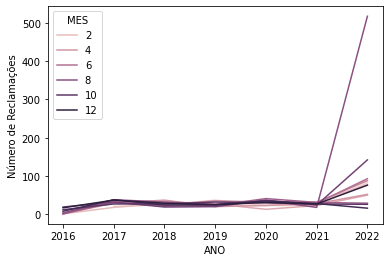

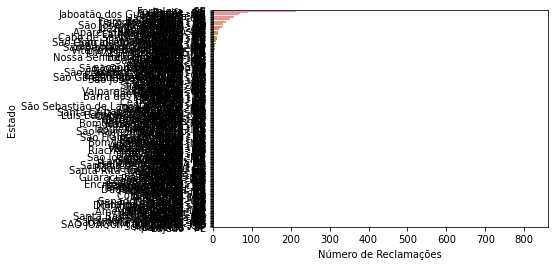

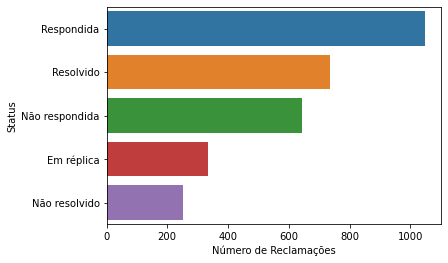

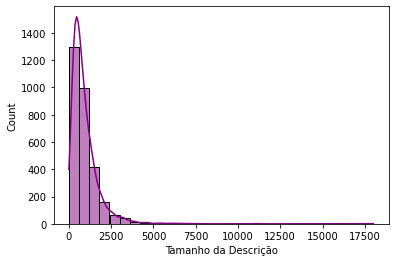

In [41]:
# Título do Dashboard
st.title("Dashboard de Reclamações de Clientes")

# Filtros dinâmicos
empresa_selecionada = st.selectbox("Seletor da Empresa", df['EMPRESA'].unique())
estado_selecionado = st.selectbox("Seletor do Estado", df['LOCAL'].unique())
status_selecionado = st.selectbox("Seletor por STATUS", df['STATUS'].unique())
tamanho_minimo_descricao = st.slider("Seletor de Tamanho Mínimo do Texto", min_value=0, max_value=500, value=0)

# Aplicar filtros
df_filtrado = df[(df['EMPRESA'] == empresa_selecionada) &
                 (df['LOCAL'] == estado_selecionado) &
                 (df['STATUS'] == status_selecionado) &
                 (df['Tamanho da Descrição'] >= tamanho_minimo_descricao)]

# Série temporal do número de reclamações
st.subheader("Série Temporal do Número de Reclamações")
df_temporal = df.groupby(['ANO', 'MES']).size().reset_index(name='Número de Reclamações')
fig_temporal, ax_temporal = plt.subplots()
sns.lineplot(data=df_temporal, x='ANO', y='Número de Reclamações', hue='MES', ax=ax_temporal)
st.pyplot(fig_temporal)

# Frequência de reclamações por estado
st.subheader("Frequência de Reclamações por Estado")
df_estado = df['LOCAL'].value_counts().reset_index()
df_estado.columns = ['Estado', 'Número de Reclamações']
fig_estado, ax_estado = plt.subplots()
sns.barplot(x='Número de Reclamações', y='Estado', data=df_estado, ax=ax_estado)
st.pyplot(fig_estado)

# Frequência de cada tipo de STATUS
st.subheader("Frequência de Cada Tipo de STATUS")
df_status = df['STATUS'].value_counts().reset_index()
df_status.columns = ['Status', 'Número de Reclamações']
fig_status, ax_status = plt.subplots()
sns.barplot(x='Número de Reclamações', y='Status', data=df_status, ax=ax_status)
st.pyplot(fig_status)

# Distribuição do tamanho do texto (coluna DESCRIÇÃO)
st.subheader("Distribuição do Tamanho do Texto (Descrição)")
df['Tamanho da Descrição'] = df['DESCRICAO'].apply(len)
fig_tamanho_descricao, ax_tamanho_descricao = plt.subplots()
sns.histplot(df['Tamanho da Descrição'], bins=30, kde=True, color='purple', ax=ax_tamanho_descricao)
st.pyplot(fig_tamanho_descricao)